Regressions between ERA5 (dif. variables) and Cloud Index (CI) in Corrientes Argentina

The anomalies are estimated in ERA5_regression_preprocess.ipynb

In this code, the regressions are estimated and plotted

* Annually
* For each season seperatelly (estimating first the seasonal mean)


In [3]:
import os
import pandas as pd 
import datetime 
import numpy as np

import iris
#from iris.analysis import MEAN
#from iris.analysis.stats import pearsonr
import iris.coord_categorisation

import scipy
from scipy.stats import theilslopes #theil-sen trends
from scipy.stats import linregress

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import iris.plot as iplt

import f_Iris
#import esmvalcore.preprocessor as ep 

In [4]:
# directories
cwd = os.getcwd()
print("Current working directory: {0}".format(cwd))

#si estoy trabajando desde el servidor vegeta
ruta_a_archivos_ERA5_mensual = "/pikachu/datos/nadia.testani/Doctorado/datos/ERA5/mon/SAm" #ruta donde estan los archivos con datos de ERA5
ruta_a_archivos_ERA5_mensual_ori = "/datos/ERA5_updated/mon" #ruta donde estan los archivos con datos de ERA5 originales
ruta_a_archivos_CI = "/pikachu/datos/nadia.testani/Doctorado/resultados/resultados2021/nubosidad/paper"
ruta_a_archivos_smn = "/pikachu/datos/nadia.testani/Doctorado/datos/smn"
ruta_a_archivos_ISCCP = "/pikachu/datos2/isccp-h/HGM"
ruta_a_resultados = "/pikachu/datos/nadia.testani/Doctorado/resultados/resultados2024" #ruta donde se guardan los resultados del analisis de nubosidad

Current working directory: /home/nadia.testani/Doctorado/DoctoradoCodigos/codigos2024


In [5]:
fecha_inicio_climatologia_str = "1983-12-15"
fecha_final_climatologia_str = "2016-11-15"

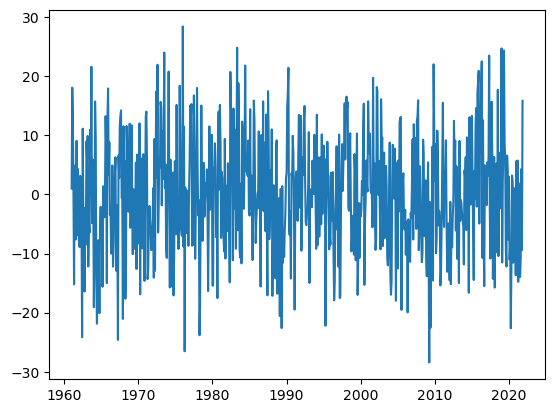

In [9]:
#Cloud Index
CI = pd.read_csv(f"{ruta_a_archivos_smn}/CI_detrend_anom_ref198312to201611.csv") #from 1961-01-01 until 2021-11-01

#set dates as index
CI = CI.set_index(CI["Unnamed: 0"]) 
CI = CI.drop(["Unnamed: 0"], axis = 1)
CI.index = pd.DatetimeIndex(CI.index)

#CI dates
date_i_CI = CI_detrend_anom.index[0]
date_f_CI = CI_detrend_anom.index[-1]

In [7]:
#ERA5
file_dir = ruta_a_archivos_ERA5_mensual
file_name = "t2m_detrend_anoms.nc"
variable_name = 't2m'
t2m = iris.load_cube(f"{file_dir}/{file_name}", variable_name) 

In [51]:
#regression
cube = t2m
series = np.array(CI)

# Extract the cube data as a NumPy array
cube_data = cube.data

# Reshape the cube data to 2D (time x space)
cube_reshaped = cube_data.reshape(cube_data.shape[0], -1)

# Perform linear regression for each grid point
regression_results = []
for point_data in cube_reshaped.T:
    slope, intercept, r_value, p_value, std_err = linregress(series, point_data)
    regression_results.append(r_value) #add p-value
    #regression_results.append({
     #   'slope': slope,
     #   'intercept': intercept,
     #   'r_value': r_value,
     #   'p_value': p_value,
     #   'std_err': std_err
    #}
    

# Convert the results to a NumPy array with the same shape as the original cube
regression_array = np.array(regression_results).reshape(cube_data.shape[1:])

# Create a new Iris cube with the regression results
regression_cube = cube[1,:,:].copy(data=regression_array)


In [1]:
#plot
plt.figure(figsize=(10, 6))
cmap = plt.get_cmap("brewer_RdYlBu_11")
iplt.contourf(regression_cube, levels=np.arange(-0.25, 0.30, 0.05), cmap=cmap.reversed()) 
plt.colorbar(label="r")
plt.title("Regression: t2m - CI Corrientes")
iplt.plt.gca().coastlines()

NameError: name 'plt' is not defined